Uniform Cost Search Solution:
Solution Path: [(0, 0), (0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 5), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 9)]
Charging Points: [(5, 5)]


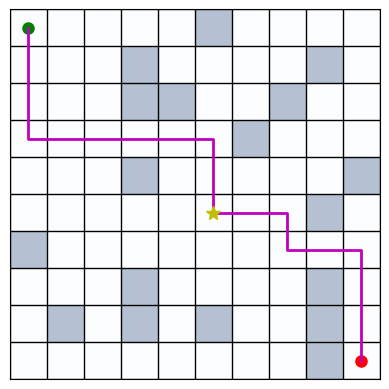

A* Search Solution:
Solution Path: [(0, 0), (0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 5), (5, 5), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 9)]
Charging Points: [(5, 5)]


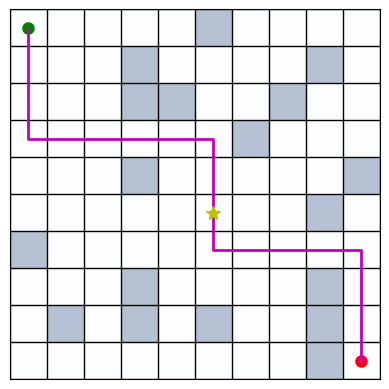

In [ ]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from collections import deque

# Node Class represents a state in the search tree.
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost

    def __lt__(self, other):
        return self.path_cost < other.path_cost

class PriorityQueue:
    def __init__(self):
        self.elements = []

    def empty(self):
        return len(self.elements) == 0

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]

def heuristic(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return abs(x1 - x2) + abs(y1 - y2)

class Environment:
    def __init__(self, grid, start, goal):
        self.grid = grid
        self.initial = start
        self.goal = goal

    def actions(self, state):
        possible_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
        x, y = state

        if x == 0 or self.grid[x - 1][y] == 1:
            possible_actions.remove('UP')
        if x == len(self.grid) - 1 or self.grid[x + 1][y] == 1:
            possible_actions.remove('DOWN')
        if y == 0 or self.grid[x][y - 1] == 1:
            possible_actions.remove('LEFT')
        if y == len(self.grid[0]) - 1 or self.grid[x][y + 1] == 1:
            possible_actions.remove('RIGHT')

        return possible_actions

    def result(self, state, action):
        x, y = state
        if action == 'UP':
            return (x - 1, y)
        if action == 'DOWN':
            return (x + 1, y)
        if action == 'LEFT':
            return (x, y - 1)
        if action == 'RIGHT':
            return (x, y + 1)

    def is_goal(self, state):
        return state == self.goal

class Agent:
    def __init__(self, env):
        self.env = env
        self.battery = 100

    def recharge(self):
        self.battery = 100

    def current_charge(self):
        return self.battery

    def bfs_search(self):
        self.recharge()
        frontier = deque([Node(self.env.initial)])
        came_from = {self.env.initial: None}

        while frontier:
            current_node = frontier.popleft()

            if self.env.is_goal(current_node.state):
                return self.reconstruct_path(came_from, current_node.state)

            for action in self.env.actions(current_node.state):
                new_state = self.env.result(current_node.state, action)
                if new_state not in came_from:
                    frontier.append(Node(new_state, current_node, action))
                    came_from[new_state] = current_node.state

        return []

    def a_star_search(self):
        self.recharge()
        start_node = Node(self.env.initial, path_cost=0)
        frontier = PriorityQueue()
        frontier.put(start_node, 0)
        came_from = {self.env.initial: None}
        cost_so_far = {self.env.initial: 0}

        while not frontier.empty():
            current_node = frontier.get()

            if self.env.is_goal(current_node.state):
                return self.reconstruct_path(came_from, current_node.state)

            for action in self.env.actions(current_node.state):
                new_state = self.env.result(current_node.state, action)
                new_cost = cost_so_far[current_node.state] + 1
                if new_state not in cost_so_far or new_cost < cost_so_far[new_state]:
                    cost_so_far[new_state] = new_cost
                    priority = new_cost + heuristic(new_state, self.env.goal)
                    frontier.put(Node(new_state, current_node, action, new_cost), priority)
                    came_from[new_state] = current_node.state

        return []

    def uniform_cost_search(self):
        self.recharge()
        frontier = PriorityQueue()
        frontier.put(Node(self.env.initial, path_cost=0), 0)
        came_from = {self.env.initial: None}
        cost_so_far = {self.env.initial: 0}

        while not frontier.empty():
            current_node = frontier.get()

            if self.env.is_goal(current_node.state):
                return self.reconstruct_path(came_from, current_node.state)

            for action in self.env.actions(current_node.state):
                new_state = self.env.result(current_node.state, action)
                new_cost = cost_so_far[current_node.state] + 1
                if new_state not in cost_so_far or new_cost < cost_so_far[new_state]:
                    cost_so_far[new_state] = new_cost
                    priority = new_cost
                    frontier.put(Node(new_state, current_node, action, new_cost), priority)
                    came_from[new_state] = current_node.state

        return []

    def reconstruct_path(self, came_from, current):
        path = []
        charge = []
        while current in came_from:
            path.append(current)
            current = came_from[current]

        path.append(self.env.initial)
        path.reverse()
        return path

    def battery_manager(self, path):
        charge = []

        for i in range(len(path)):
            if self.current_charge() <= 10:
                charge.append(path[i])
                self.recharge()
            elif path[i] != (0, 0):
                self.battery = self.current_charge() - 10

        return charge

def visualize_grid_and_path(grid, path, charge):
    grid_array = np.array(grid)
    fig, ax = plt.subplots()
    ax.imshow(grid_array, cmap='Blues', alpha=0.3)
    start = path[0]
    goal = path[-1]
    ax.plot(start[1], start[0], 'go', markersize=8)
    ax.plot(goal[1], goal[0], 'ro', markersize=8)
    xs, ys = zip(*path)
    ax.plot(ys, xs, 'm-', linewidth=2)
    if charge is not None:
        xa, ya = zip(*charge)
        ax.plot(ya, xa, 'y*', markersize=10)
    ax.set_xticks(np.arange(-.5, len(grid[0]), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(grid), 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", size=0)
    ax.tick_params(which="major", bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()

grid_size = 10
obstacle_probability = 0.2
grid = generate_random_grid(grid_size, obstacle_probability)
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)
grid[start] = 0
grid[goal] = 0
environment = Environment(grid, start, goal)
agent = Agent(environment)

print("Uniform Cost Search Solution:")
solution_path_ucs = agent.uniform_cost_search()
charging_point = agent.battery_manager(solution_path_ucs)
print("Solution Path:", solution_path_ucs)
print("Charging Points:", charging_point)
visualize_grid_and_path(grid, solution_path_ucs, charging_point)

print("A* Search Solution:")
solution_path_a_star = agent.a_star_search()
charging_point = agent.battery_manager(solution_path_a_star)
print("Solution Path:", solution_path_a_star)
print("Charging Points:", charging_point)
visualize_grid_and_path(grid, solution_path_a_star, charging_point)
